<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">بسم الله الرحمن الرحيم</p>

# Linear Regression: Medical Costs

# Problem

Predict the <b>individual medical costs</b> billed by the health insurance from given features such as age, sex, BMI(body mass index), number of children etc

# Model Selection and Description

We will use <b>linear regression</b> which is a <b>supervised learning algorithm </b>. It will establish a relationship between a dependent variable(y) and one or more independent/predictor variables(x). The best fittig relationship will be determined by <b>ordinary least squares(OLS)</b> and <b>mean square error(MSE)</b>

OLS is used to minimize the sum of square difference between observed and predicted values


## Library Import

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Dataset Import

In [11]:
df = pd.read_csv('Data/medical_cost_insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Our <b>dependent/target</b> variable is "charges" and the <b>independent/predictors</b> are "age, sex, bmi, children, smoker and region" a sample equation would be the following:

charges(y) = intercept + age(x1) + sex(x2) + bmi(x3) + children(x4) + smoker(x5) + region(x6)

## Exploratory Data Analysis

We will fit a line using bmi as the predictor variable

Text(0.5, 1.0, 'Medical Charge vs BMI')

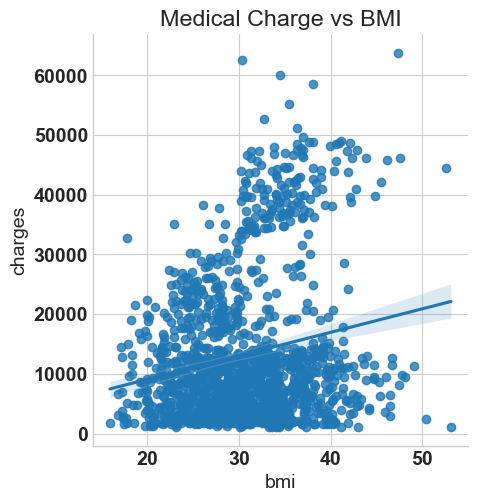

In [15]:
sns.lmplot(x='bmi', y='charges', data=df)
plt.title('Medical Charge vs BMI')

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Plots

### Correlation Plot

<AxesSubplot:>

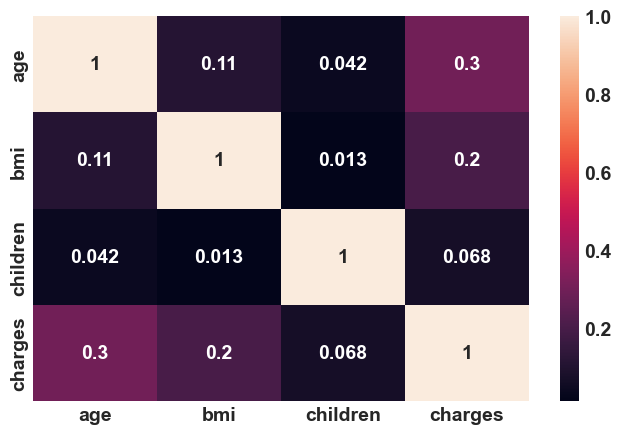

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True)

There is no correlation among variables. The most correlated feature with charges is age followed by bmi

Text(0.5, 1.0, 'Distribution of insurance charges in $log$ scale')

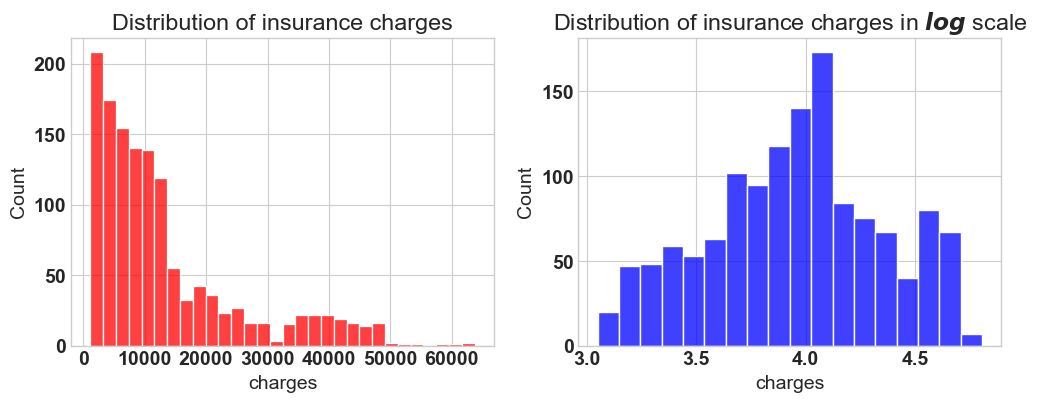

In [35]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['charges'],color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')

The distribution of insurance charges is rightly skewed, when we take the common log10, the distribution approximates a normal distribution. We will use the log10 values of the dependent variable moving forward

<AxesSubplot:xlabel='smoker', ylabel='charges'>

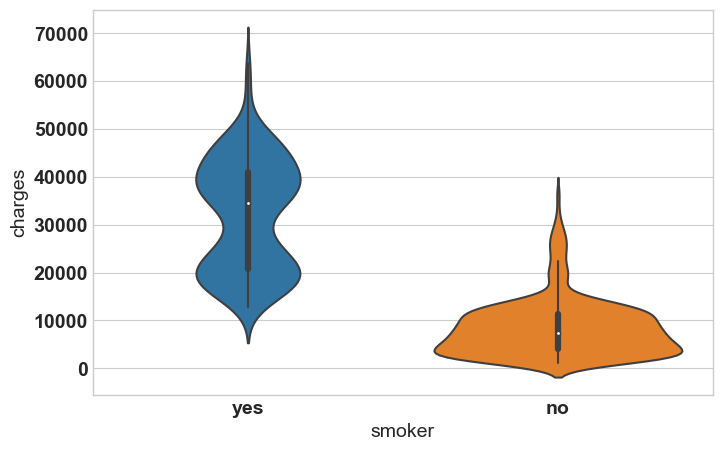

In [36]:
sns.violinplot(x='smoker', y='charges', data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

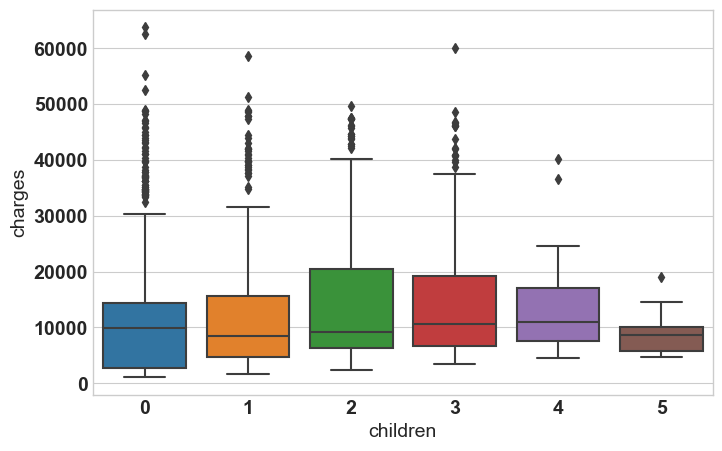

In [43]:
sns.boxplot(x='children', y='charges', data=df)

In [47]:
df.groupby('children').agg(['median'])['charges']

,median
children,
0,9856.95190
1,8483.87015
2,9264.97915
3,10600.54830
4,11033.66170
5,8589.56505


<AxesSubplot:xlabel='region', ylabel='charges'>

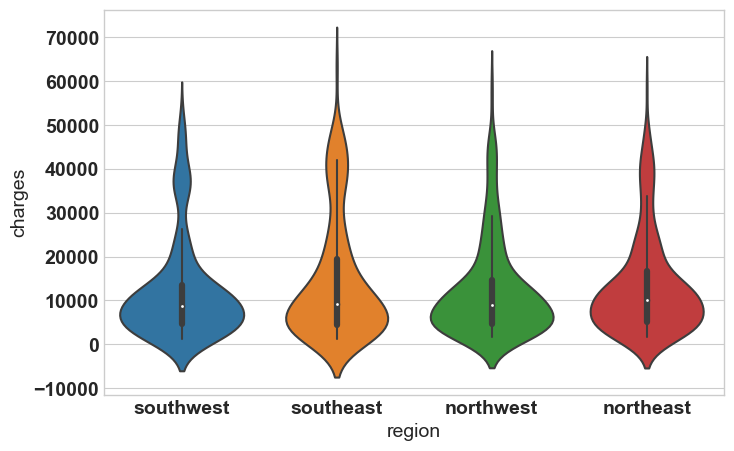

In [50]:
sns.violinplot(x='region', y='charges', data=df, pallete='rainbow')

In [51]:
## Data Pre
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Preprocessing

### Encoding

Machine learning algorithms cannot work with categorical data directly. They must be converted to a numeric value:
1. <b>Label Encoding</b>: Transform the labels into numerical form e.g southwest is 0, northwest is 1 etc
2. <b>One Hot Encoding</b>: Transform the numerical labels into new columns e.g 0, 1, 2 etc
3. <b>Dummy Variable Trap</b>: Same as One Hot Encoding, however the columns are named using the label e.g southwest, northwest etc

### Dummy Variable Encoding

In [56]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

In [57]:
df_encode.columns

Index(['age', 'bmi', 'charges', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4',
       'OHE_5', 'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest'],
      dtype='object')

### Log Transform the charges dependent variable

In [58]:
df_encode['charges'] = np.log(df_encode['charges'])

## Model Building

### Train/Test Split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encode.loc[:,df_encode.columns != 'charges'], df_encode['charges'],test_size=0.25, random_state=0, shuffle=True)

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
linRegression = LinearRegression()
linRegression.fit(X_train, y_train)

LinearRegression()

## Make Predictions

In [74]:
y_pred = linRegression.predict(X_test)

Compare the predictions with the actual values

In [83]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
df_pred

,Actual,Predicted,Difference
578,9.182407,9.193497,-0.011090
610,9.053417,9.006938,0.046479
569,10.729898,10.976236,-0.246338
1034,9.468857,9.538951,-0.070095
198,9.174117,8.935098,0.239020
...,...,...,...
574,9.489793,9.717623,-0.227830
1174,8.397038,8.620312,-0.223273
1327,9.146112,9.109598,0.036513
817,8.188021,8.346107,-0.158086


In [78]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2818357573503496
Mean Squared Error: 0.18253381257032877
Root Mean Squared Error: 0.42723976005321507


In [80]:
linRegression.score(X_test, y_test)

0.7839800091227542

In [89]:
X_test

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
578,52,30.200,1,1,0,0,0,0,0,0,0,1
610,47,29.370,0,1,0,0,0,0,0,0,1,0
569,48,40.565,1,0,1,0,0,0,1,1,0,0
1034,61,38.380,1,0,0,0,0,0,0,1,0,0
198,51,18.050,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
574,57,34.295,0,0,1,0,0,0,0,0,0,0
1174,29,32.110,1,0,1,0,0,0,0,1,0,0
1327,51,30.030,1,1,0,0,0,0,0,0,1,0
817,23,37.100,1,0,0,1,0,0,0,0,0,1


In [94]:
np.exp(linRegression.predict([[37,29.830,1,0,1,0,0,0,0,1,0,0]]))

/Users/muhammedmafawalla/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([7074.2893258])

<AxesSubplot:xlabel='charges', ylabel='Count'>

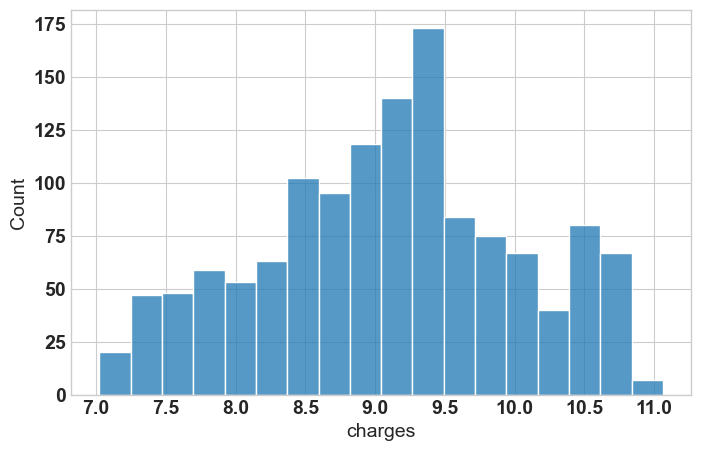

In [93]:
sns.histplot(df_encode.charges)